In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim

In [16]:
def display_image(im, title=None, cmap='gray', colored=False):
    
    dpi = mpl.rcParams['figure.dpi']
    if colored:
        
        height, width, depth = np.asarray(im).shape
    else:
        height, width = np.asarray(im).shape
        
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    plt.imshow(im, cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
def load_image(image_path):
    im = cv2.imread(image_path)
    return im

def load_scorebox_area(image_path):
    return cv2.imread(image_path,0)[314:347,:]

def sharpen_image(img_arr, display=False, thresh=180):
    ret, mask = cv2.threshold(img_arr, thresh, 255, cv2.THRESH_BINARY)
    return mask


def enlarge_image(img_arr, basewidth=300):
    img = Image.fromarray(img_arr)
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    print(basewidth, hsize)
    return np.asarray(img)


def get_bw_image(img_arr, thresh=180):
    
    fn = lambda x : 255 if x < thresh else 0
    return Image.fromarray(img_arr).point(fn, mode='1')
   
    

### Regions of interest in the scorebox overlay - scorecount, overcount, bastmen scores

In [3]:
    
#tesseract psm: https://stackoverflow.com/questions/44619077/pytesseract-ocr-multiple-config-options

def get_overs(img_arr, display=False, threshold=120):
    img_arr = sharpen_image(enlarge_image(img_arr[:20, 186:215]), thresh=threshold)
    img = get_bw_image(img_arr, thresh=threshold)
    if display:
        display_image(img, 'over count')
    return pytesseract.image_to_string(img, config="--psm 7 -c tessedit_char_whitelist=0123456789.").strip() 


def get_score(img_arr, display=False, threshold=120):
    img_arr = sharpen_image(enlarge_image(img_arr[:20, 125:175]), thresh=threshold)
    img = get_bw_image(img_arr, thresh=threshold)
    if display:
        display_image(img, 'wicket-score count')
    return pytesseract.image_to_string(img, config="--psm 7 -c tessedit_char_whitelist=0123456789/-").strip()

def get_batsman1_score(img_arr, display=False, threshold=180):
    img_arr = sharpen_image(enlarge_image(img_arr[18:35, 225:335]), thresh=threshold)
    img = get_bw_image(img_arr, thresh=threshold)
    if display:
        display_image(img, "batsman # 1's score")
    return pytesseract.image_to_string(img, config="--psm 7").strip()#Treat the image as a single text line.


def get_batsman2_score(img_arr, display=False, threshold=180):
    img_arr = sharpen_image(enlarge_image(img_arr[18:35, 330:440]), thresh=threshold)
    img = get_bw_image(img_arr, thresh=threshold)
    if display:
        display_image(img, "batsman # 2's score")
    return pytesseract.image_to_string(img, config="--psm 7").strip()


#psm 6    Assume a single uniform block of text.
#psm 7    Treat the image as a single text line.

### Testing OCR

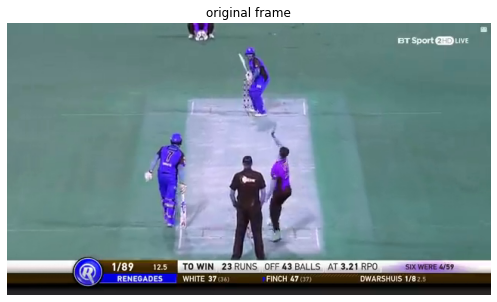

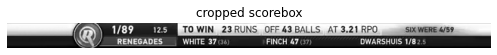

In [109]:
img_path = '/home/alina/Desktop/DS5500/code/data/positive/start_melVSsyd_1297.png' #640x360, 231, 1365
sample = load_image(img_path)
display_image(sample, 'original frame', colored=True)
scorebox = load_scorebox_area(img_path)
display_image(scorebox, 'cropped scorebox')

300 206


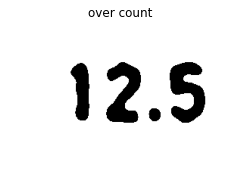

'12.5'

In [117]:
get_overs(scorebox, display=True, threshold=120)

300 120


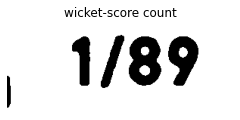

'1/89'

In [118]:
get_score(scorebox, display=True, threshold=120)

300 40


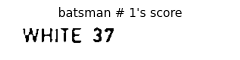

'WHITE 37'

In [119]:
get_batsman1_score(scorebox, display=True, threshold=180)

300 40


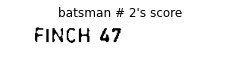

'FINCH 47'

In [120]:
get_batsman2_score(scorebox, display=True, threshold=180)

## Image processing

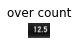

300 206


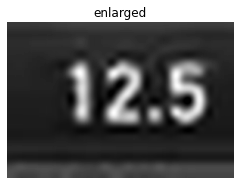

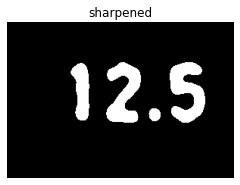

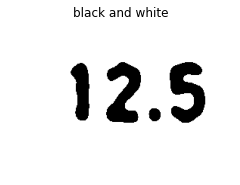

300 206
OCR output:  12.5


In [114]:
imgs = []
from PIL import Image
from PIL import ImageOps

over_count = scorebox[:20, 186:215] #crop relevant region of scorebox
display_image(over_count, title='over count')

imgs.append(cv2.copyMakeBorder(over_count, 93, 93, 135, 135, cv2.BORDER_CONSTANT, value=(255,255,255)))


enlarged = enlarge_image(over_count)
display_image(enlarged, title='enlarged')
imgs.append(enlarged)


sharpened = sharpen_image(enlarged, display=True, thresh=120)
display_image(sharpened, 'sharpened')
imgs.append(sharpened)


bw = get_bw_image(sharpened, thresh=120)
display_image(bw, 'black and white')
imgs.append(np.asarray(bw))


print('OCR output: ', get_overs(scorebox, display=False, threshold=120))

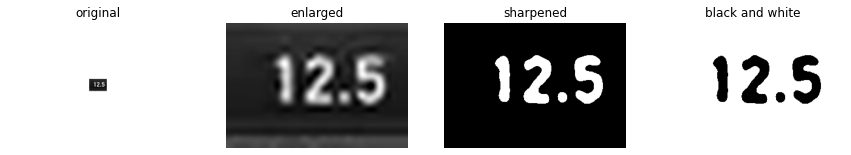

In [121]:
_, axs = plt.subplots(1, 4, figsize=(15, 15))
titles = ['original', 'enlarged', 'sharpened', 'black and white']
axs = axs.flatten()

for img, ax, title in zip(imgs, axs, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.show()

In [116]:
imgs[0].shape

(206, 299)

In [62]:
len(np.asarray(oc)[0,])

300

In [63]:
len(np.asarray(over_count)[0,])


29